Bartosz Klimza

# ADZD - lab 2

Przygotowanie Sparka

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 15.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=0e77644a89a8991e9efa0a42439df477da5efd9d869a6a5d188f0f0499dd2a4a
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Zadanie 1: Narysuj wykres zależności kolumn Plot Infant mortality vs. Literacy dla 30 najbogatszych i 30 najbiedniejszych krajów

In [ ]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)
countries.toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,NaN,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [ ]:
full_countries = countries.select("Country", "Infant mortality (per 1000 births)", "Literacy (%)", "GDP ($ per capita)").na.drop()
full_countries = full_countries.sort("GDP ($ per capita)").toPandas()

poor_countries = full_countries.head(30)
rich_countries = full_countries.tail(30)

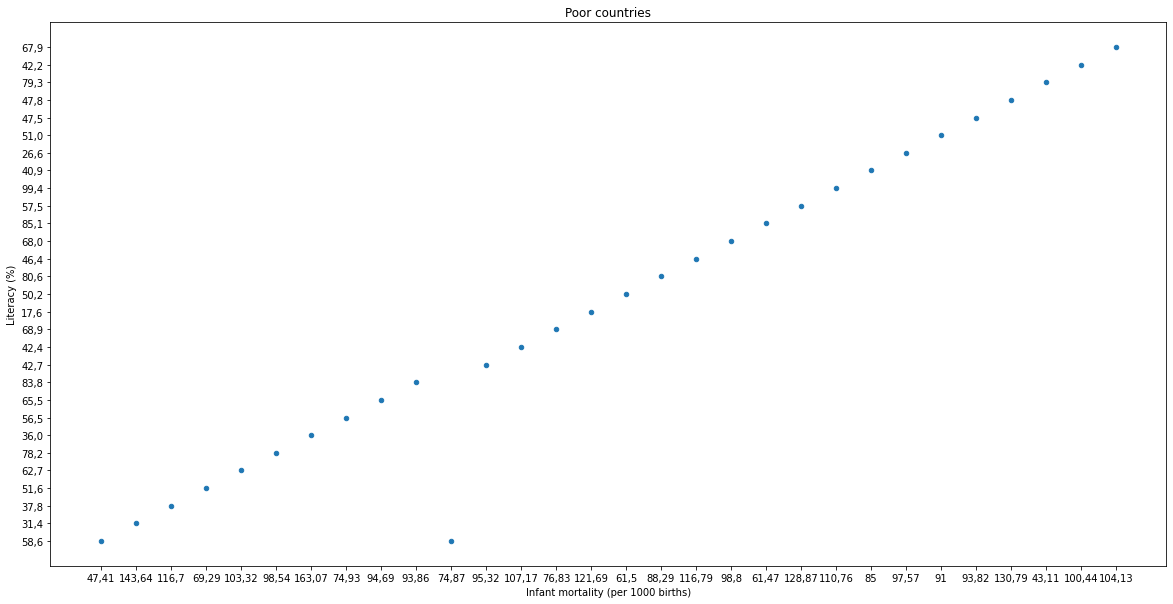

In [ ]:
poor_countries.plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",title="Poor countries",figsize=(20, 10))

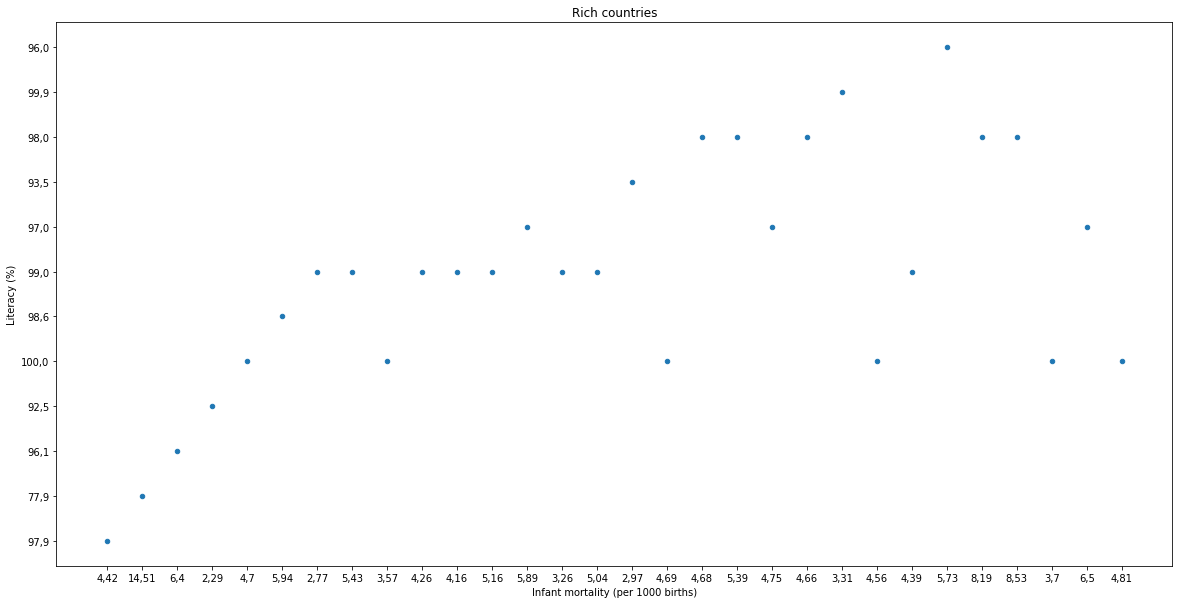

In [ ]:
rich_countries.plot(x="Infant mortality (per 1000 births)",y="Literacy (%)",kind="scatter",title="Rich countries",figsize=(20, 10))

Zadanie 2: Wczytaj zbiór danych "airports.csv" ze strony https://www.kaggle.com/jonatancr/airports (zawiera on dane na temat lotnisk z całego świata). Ponieważ w zbiorze tym nie ma nagłówka, nadaj własne nazwy kolumnom, korzystając z opisu pliku na stronie https://openflights.org/data.html. Narysuj na wykresie (mapie) położenia wszystkich/wybranych lotnisk.

In [ ]:
airports = spark.read.csv("airports.csv",inferSchema=True,header=True)
airports = airports.toPandas()
airports.columns=["Airport ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone", "Type", "Source"]

In [ ]:
coords_lat, coords_lon = airports["Latitude"], airports["Longitude"]
coords_dict = dict()
for row in range(len(coords_lat)):
  coords_dict[coords_lat.iloc[row]] = coords_lon.iloc[row]

In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip


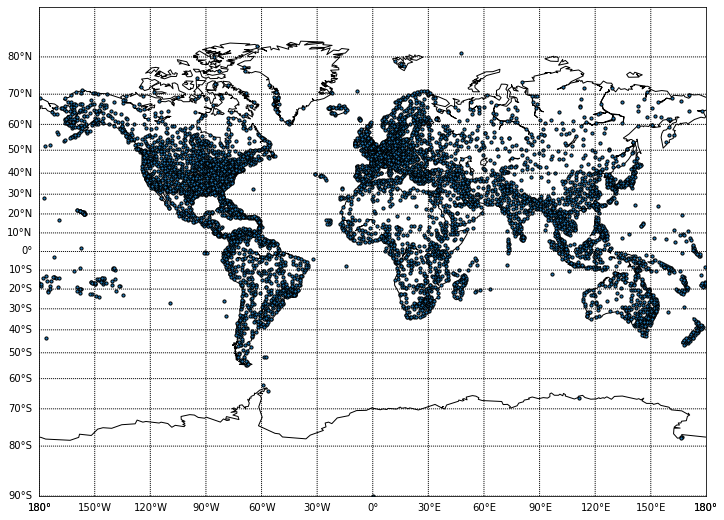

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = list(coords_dict.keys())
sites_lon_x = list(coords_dict.values())

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=10, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

Zadanie 3: Utwórz dwie nowe kolumny w ramce "Countries", w których powierzchnia i gęstość zaludnienia wyrażone sa odpowiednio w milach kwadratowych i osobach na milę kwadratową
  * Nazwy nowych kolumn proszę ustawić odpowiednio na 'Area (sq mi)' oraz 'Pop Density (per sq mi)'
  * Uwaga: Typami nowych kolumn mają być odpowiednio integer (powierzchnia) i float (gęstość). Zaokrąglanie do integer: "int(x)"

In [ ]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)
countries = countries.toPandas()
countries.insert(3, "Area (sq mi)", None)
countries.insert(4, "Pop Density (per sq mi)", None)
countries["Area (sq mi)"] = (countries["Area (sq. mi.)"] / 2.59).astype(int)
countries["Pop. Density (per sq. mi.)"] = (countries["Pop. Density (per sq. mi.)"].str.replace(',','.')).astype(np.float)
countries["Pop Density (per sq mi)"] = countries["Pop. Density (per sq. mi.)"] * 2.59
countries

,Country,Region,Population,Area (sq mi),Pop Density (per sq mi),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,250000,124.320,647500,48.0,"0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,11099,322.714,28748,124.6,"1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,919590,35.742,2381740,13.8,"0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,76,752.136,199,290.4,"58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,180,393.939,468,152.1,"0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,2262,1087.541,5860,419.9,"0,00","2,98","19,62",800.0,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,102702,2.590,266000,1.0,"0,42",None,None,NaN,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,203849,105.154,527970,40.6,"0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,290584,39.627,752614,15.3,"0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


Zadanie 4: Na wykresie scatterplot narysuj zależność liczby lotnisk od powierzchni kraju.
  * Dane potrzebne do wykresu są w dwóch ramkach (Countries i Airports), konieczne więc będzie ich złączenie.
  * Nie zawsze nazwy tych samych krajów będą identyczne w obu ramkach, co może stanowić problem (złączenie nie powstanie). Zastanów się jak przy pomocy mechanizmu złączeń wykryć, które nazwy się różnią. Stwórz odpowiednią ramkę, która zawiera takie nazwy.
  * Następnie zmień nazwy kilku największych państw w jednej z ramek, tak żeby ujednolicić nazwy. Można to zrobić funkcją replace.

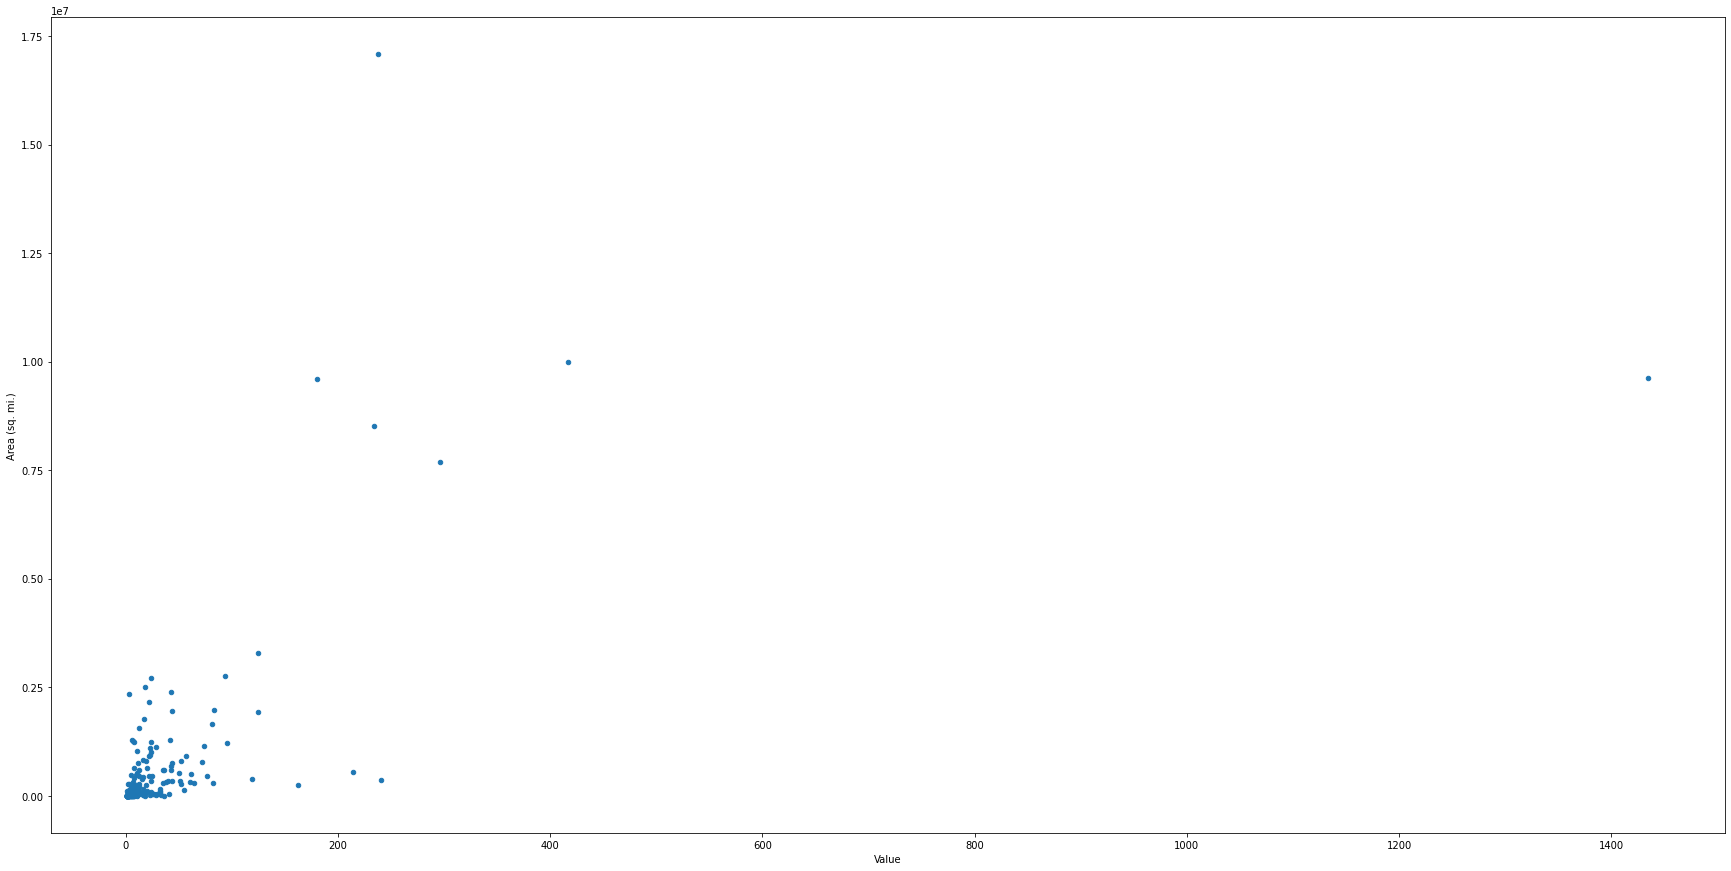

In [ ]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)
countries = countries.toPandas()

airports = spark.read.csv("airports.csv",inferSchema=True,header=True)
airports = airports.toPandas()
airports.columns=["Airport ID", "Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone", "Type", "Source"]

#Tworzę nowy dataframe ze wszystkimi nazwami krajów, usuwam duplikaty i analizuję różnice
all_countries = pd.merge(countries["Country"], airports["Country"], how="outer").drop_duplicates(subset="Country")
all_countries = all_countries.sort_values(by=["Country"])

# Zmieniam nazwy krajów, gdzie znalazłem różnice
countries = countries.replace(["Bahamas, The ", "Bosna & Herzegovina ", "Central Africal Rep. ", "Congo, Dem. Rep. ", "Congo, Repub. of the ", "Gambia, The ", "Saint Kitts & Nevis ", "Sao Tome & Principe ", "Trinidad & Tobago "], ["Bahamas ", "Bosna and Herzegovina ", "Central Africal Republic ", "Congo (Brazzaville) ", "Congo (Kinshasa) ", "Gambia ", "Saint Kitts and Nevis ", "Sao Tome and Principe ","Trinidad and Tobago "])


airports.insert(0, "Value", 1)
airports = airports.groupby(by=["Country"]).sum()
airports.insert(0, "Country", airports.index)

airports = airports.iloc[:, :2]
countries = countries[["Country", "Area (sq. mi.)"]]
countries.insert(0, "Value", np.nan)

for i in range(len(countries)):
  if str(countries.loc[i]["Country"])[:-1] in airports["Country"]:
    countries.at[i, "Value"] = int(airports.loc[str(countries.loc[i]["Country"])[:-1]]["Value"])

countries =countries.dropna()
countries.plot(y="Area (sq. mi.)", x="Value", kind="scatter", figsize=(30,15))
